In [3]:
import pandas as pd

# Load the training and test data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# columns, data types, and missing values
train_df.info()

# Basic statistics
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Total missing values per column
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

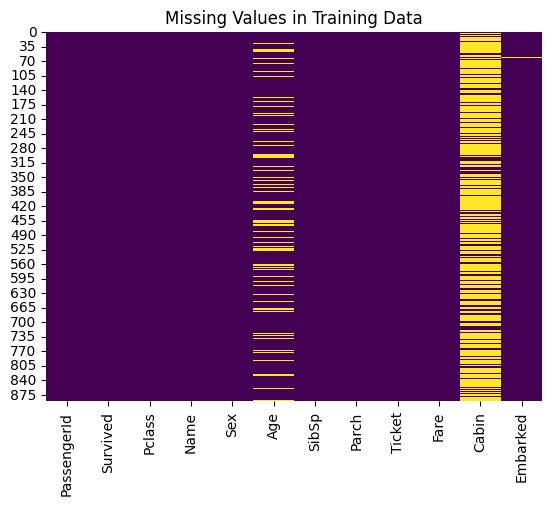

In [6]:
# Visualize missing data (optional but helpful)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Training Data")
plt.show()


In [7]:
train_df[["Sex", "Survived"]].groupby("Sex").mean()


,Survived
Sex,
female,0.742038
male,0.188908


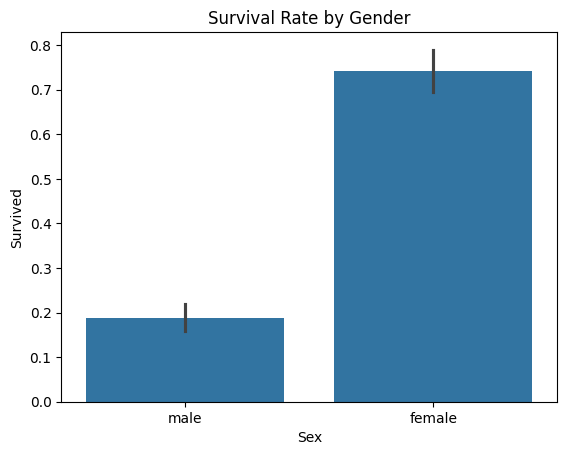

In [8]:
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.title("Survival Rate by Gender")
plt.show()


In [9]:
train_df[["Pclass", "Survived"]].groupby("Pclass").mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


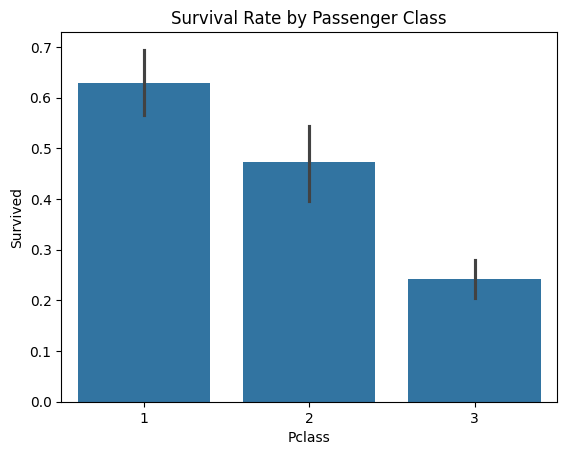

In [10]:
sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.title("Survival Rate by Passenger Class")
plt.show()


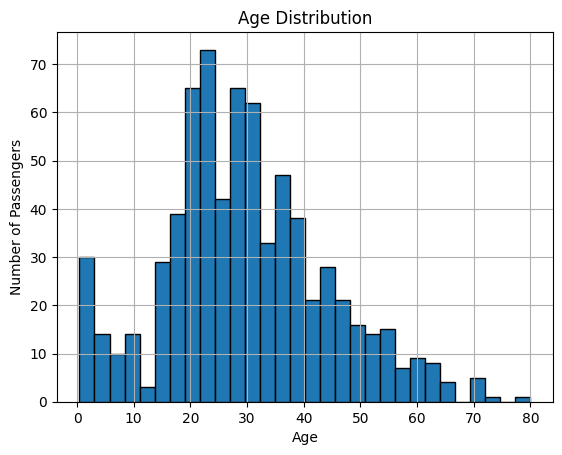

In [11]:
train_df["Age"].hist(bins=30, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()


In [12]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)


C:\Users\tasne\AppData\Local\Temp\ipykernel_2328\2285015358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
C:\Users\tasne\AppData\Local\Temp\ipykernel_2328\2285015358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [14]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

C:\Users\tasne\AppData\Local\Temp\ipykernel_2328\177627364.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)


In [15]:
train_df.drop("Cabin",axis=1, inplace=True)
test_df.drop("Cabin",axis=1, inplace=True)

In [16]:
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

C:\Users\tasne\AppData\Local\Temp\ipykernel_2328\228190216.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)


In [17]:
train_df["Sex"]=train_df["Sex"].map({"male":0, "female":1})
test_df["Sex"] = test_df["Sex"].map({"male":0,"female":1})

In [18]:
train_df=pd.get_dummies(train_df,columns=["Embarked"],drop_first=True)
test_df = pd.get_dummies(test_df,columns=["Embarked"],drop_first=True)

In [19]:
cols_to_drop = ["Name","Ticket","PassengerId"]
train_df.drop(cols_to_drop,axis=1, inplace=True)
test_passenger_ids= test_df["PassengerId"]
test_df.drop(cols_to_drop,axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split


X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

# Split for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y_pred = model.predict(X_val)


print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[90 15]
 [19 55]]


In [26]:
test_predictions = model.predict(test_df)


In [27]:
submission = pd.DataFrame({
    "PassengerId":test_passenger_ids,
    "Survived":test_predictions
})

submission.to_csv("titanic_submission.csv",index=False)